# 0.0 Imports

In [49]:
import pandas    as pd
import numpy     as np
import seaborn   as sns
import warnings
import re


from IPython.core.display  import HTML
from matplotlib            import pyplot as plt

warnings.filterwarnings('ignore')

## 0.1 Helper Functions

In [50]:
def jupyter_settings():
        %matplotlib inline
        
        plt.style.use('bmh')
        plt.rcParams['figure.figsize'] = [25 , 12]
        plt.rcParams['font.size'] = 24
        
        display( HTML( '<style>.container { width:100% !important; }</style>') )
        pd.options.display.max_columns = None
        pd.options.display.max_rows = None
        pd.set_option( 'display.expand_frame_repr', False )
        
        sns.set()

In [51]:
jupyter_settings()

## 0.2 Load Dataset

In [52]:
data = pd.read_json('receitas.json')

In [53]:
data.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


# 1.0 Descriptive Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB


In [5]:
data.shape[0]

20130

In [7]:
data.isna().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

In [8]:
data.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


In [29]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
cat_attributes = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [33]:
#Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.nanmedian)).T


#dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T
                  
#concat
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes,', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m  

,"attributes,",min,max,range,mean,median,std,skew,kurtosis
0,fat,0.0,1722763.0,1722763.0,346.097498,17.000,20430.378819,78.247565,6417.717190
1,calories,0.0,30111218.0,30111218.0,6307.856848,331.000,358573.900176,77.120025,6287.313164
2,protein,0.0,236489.0,236489.0,99.946199,8.000,3835.496264,53.629979,2992.557678
3,rating,0.0,5.0,5.0,3.713060,4.375,1.343110,-1.868338,2.646511
4,sodium,0.0,27675110.0,27675110.0,6211.473832,294.000,332879.834167,75.403816,6055.044290


# 1.1 Feature Engineering

In [ ]:
data['year'] = data['date'].dt.year

data['month'] = data['date'].dt.year

data['day'] = data['day'].dt.year

# 1.2 Correlation Map

<AxesSubplot: >

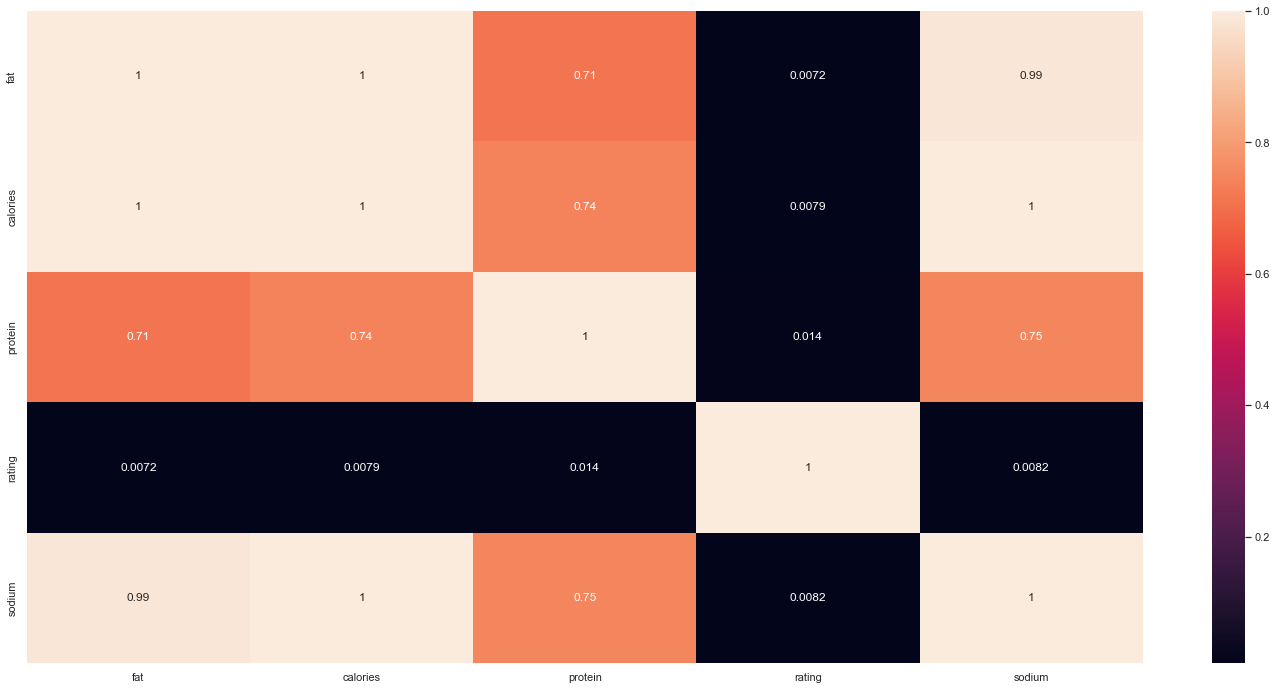

In [42]:
sns.heatmap(data.corr(method='pearson'), annot=True)

# 1.3 Distribution 

<AxesSubplot: xlabel='fat'>

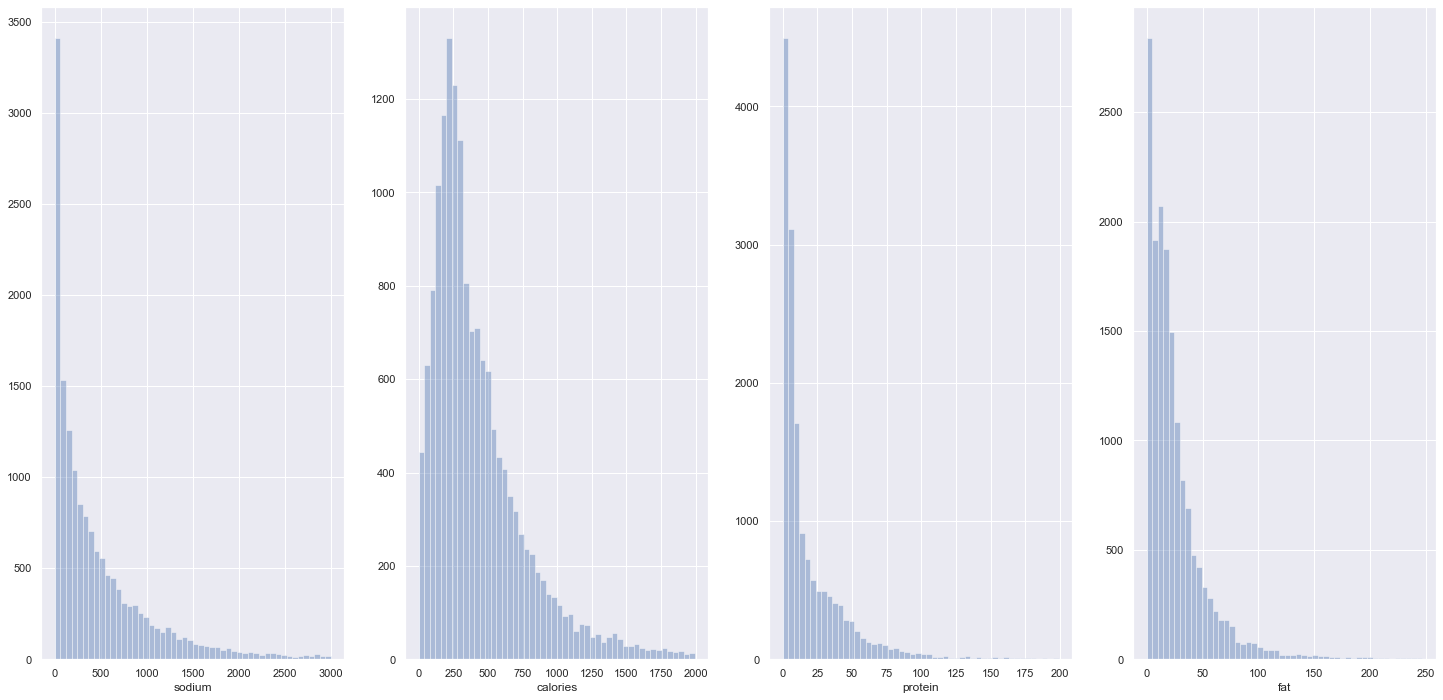

In [74]:
plt.subplot(1, 4, 1)
aux = data[data['sodium'] < 3000]

sns.distplot(aux['sodium'], kde=False)

plt.subplot(1, 4, 2)
aux = data[data['calories'] < 2000]

sns.distplot(aux['calories'], kde=False)

plt.subplot(1 , 4, 3)
aux = data[data['protein'] < 200]

sns.distplot(aux['protein'], kde=False)


plt.subplot(1, 4, 4)
aux = data[data['fat'] < 250]

sns.distplot(aux['fat'], kde=False)

<AxesSubplot: xlabel='rating'>

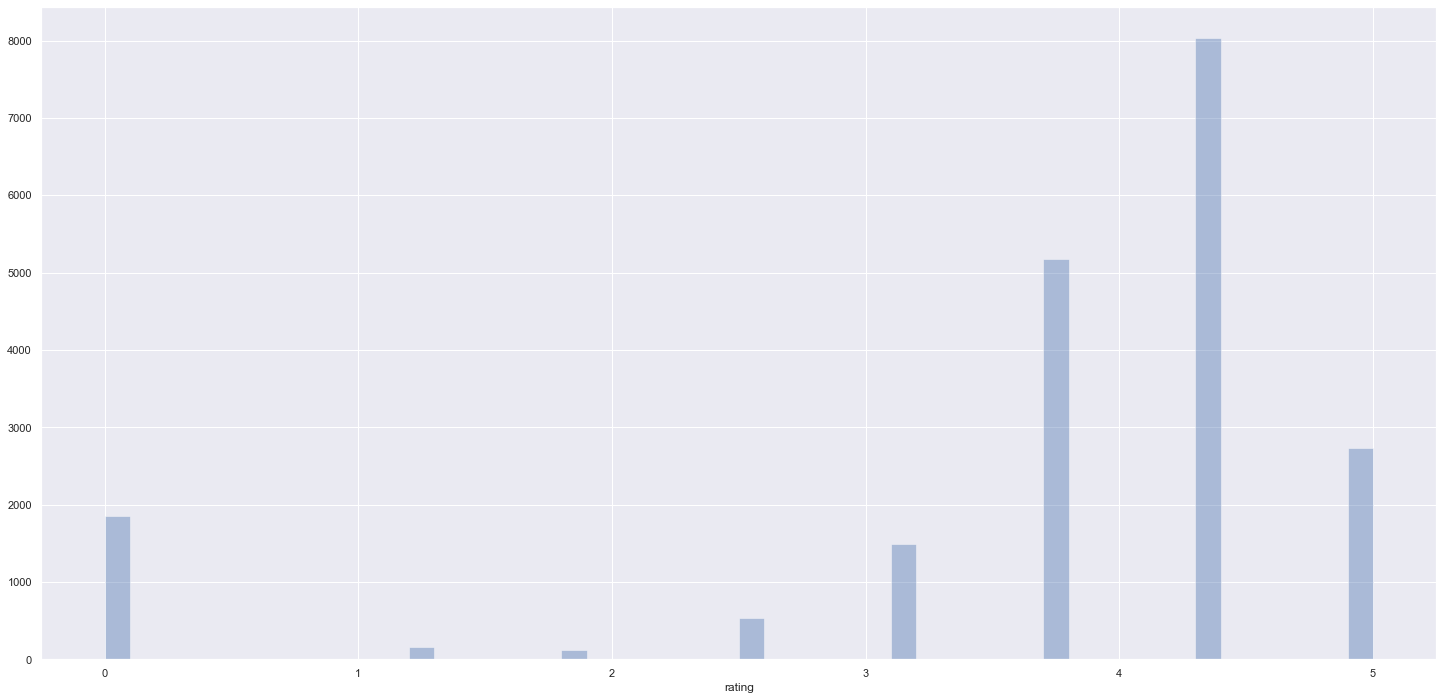

In [76]:
sns.distplot(data['rating'], kde=False)

## 1.4 Bivariate Analysis

### 1.4.1 Per Rating

<AxesSubplot: xlabel='rating', ylabel='fat'>

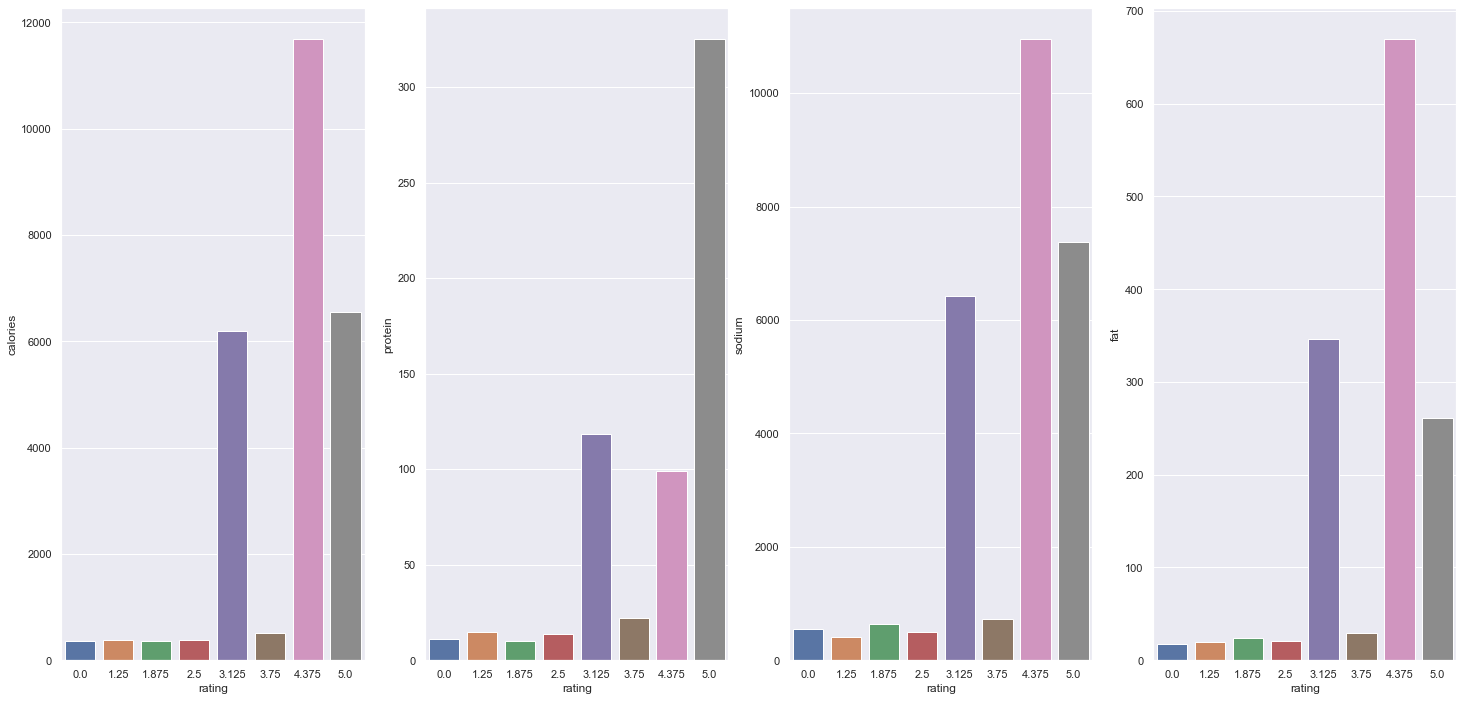

In [104]:
plt.subplot(1, 4, 1)
aux1 = data[['rating', 'calories']].groupby('rating').mean().reset_index()
sns.barplot(data = aux1, x= 'rating', y = 'calories')

plt.subplot(1, 4, 2)
aux1 = data[['rating', 'protein']].groupby('rating').mean().reset_index()
sns.barplot(data = aux1, x= 'rating', y = 'protein')

plt.subplot(1, 4, 3)
aux1 = data[['rating', 'sodium']].groupby('rating').mean().reset_index()
sns.barplot(data = aux1, x= 'rating', y = 'sodium')

plt.subplot(1, 4, 4)
aux1 = data[['rating', 'fat']].groupby('rating').mean().reset_index()
sns.barplot(data = aux1, x= 'rating', y = 'fat')


### 1.4.2 Per Year

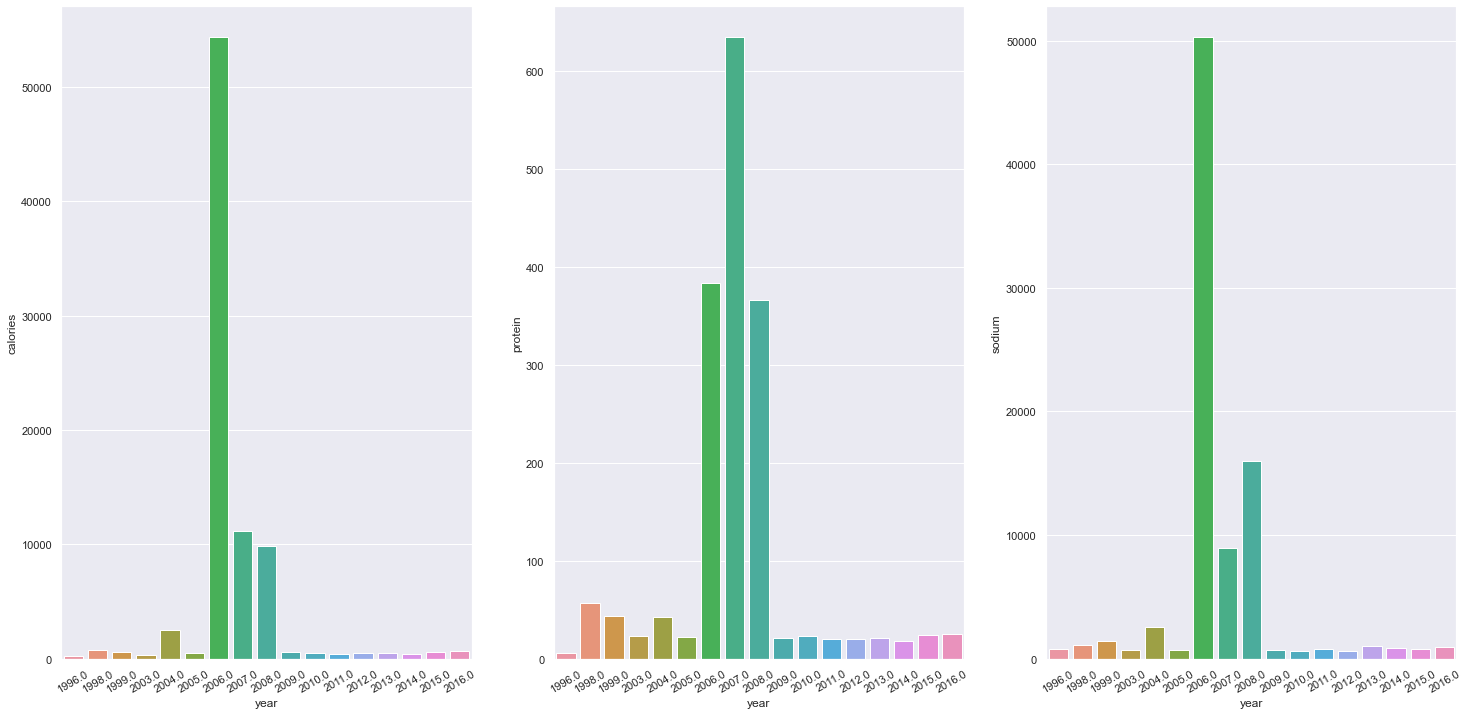

In [97]:
plt.subplot(1, 3, 1)
aux1 = data[['calories', 'year']].groupby('year').mean().reset_index()
sns.barplot(data = aux1, x= 'year', y = 'calories')
plt.xticks(rotation=30);

plt.subplot(1, 3, 2)
aux1 = data[['year', 'protein']].groupby('year').mean().reset_index()
sns.barplot(data = aux1, x= 'year', y = 'protein')
plt.xticks(rotation=30);

plt.subplot(1, 3, 3)
aux1 = data[['year', 'sodium']].groupby('year').mean().reset_index()
sns.barplot(data = aux1, x= 'year', y = 'sodium')
plt.xticks(rotation=30);

### 1.4.3 Per Month

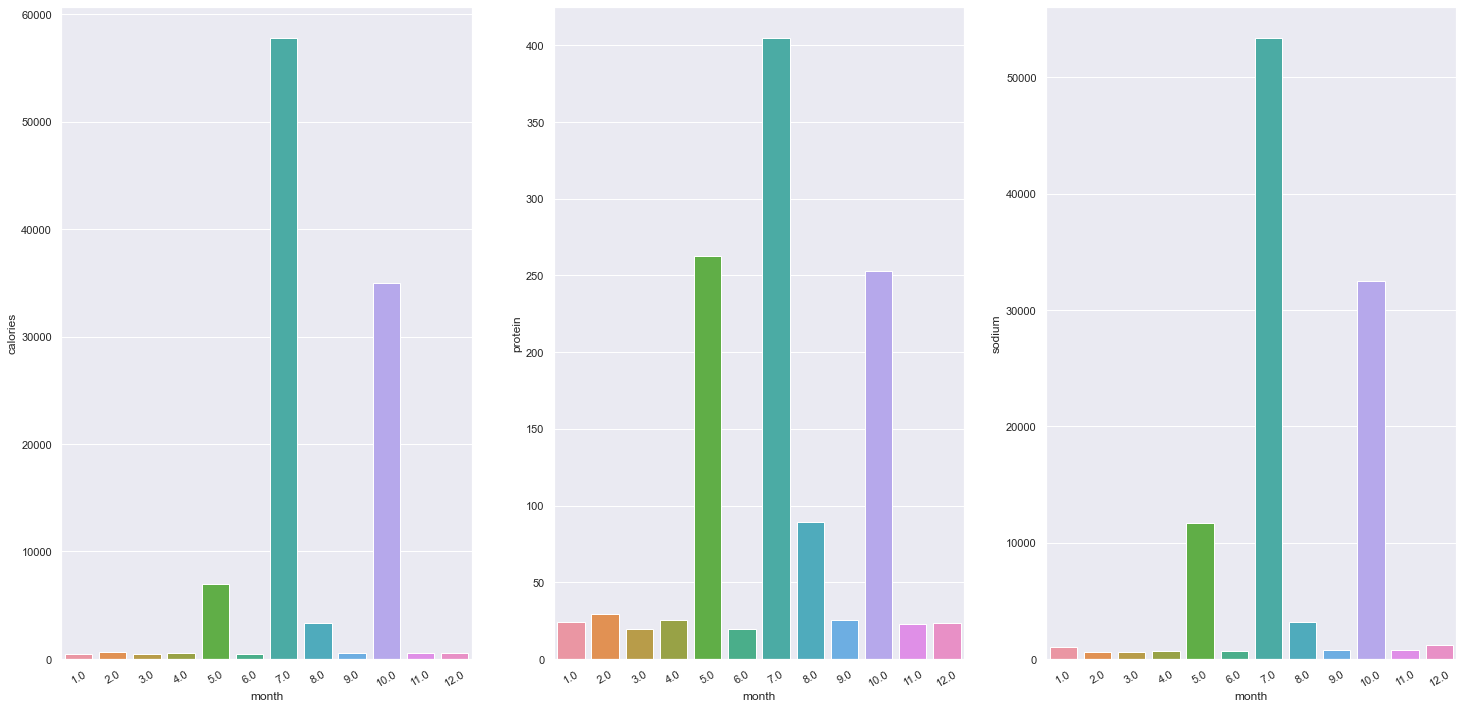

In [115]:
plt.subplot(1, 3, 1)
aux1 = data[['calories', 'month']].groupby('month').mean().reset_index()
sns.barplot(data = aux1, x= 'month', y = 'calories')
plt.xticks(rotation=30);

plt.subplot(1, 3, 2)
aux1 = data[['month', 'protein']].groupby('month').mean().reset_index()
sns.barplot(data = aux1, x= 'month', y = 'protein')
plt.xticks(rotation=30);

plt.subplot(1, 3, 3)
aux1 = data[['month', 'sodium']].groupby('month').mean().reset_index()
sns.barplot(data = aux1, x= 'month', y = 'sodium')
plt.xticks(rotation=30);

### 1.4.4 Per Interval Protein

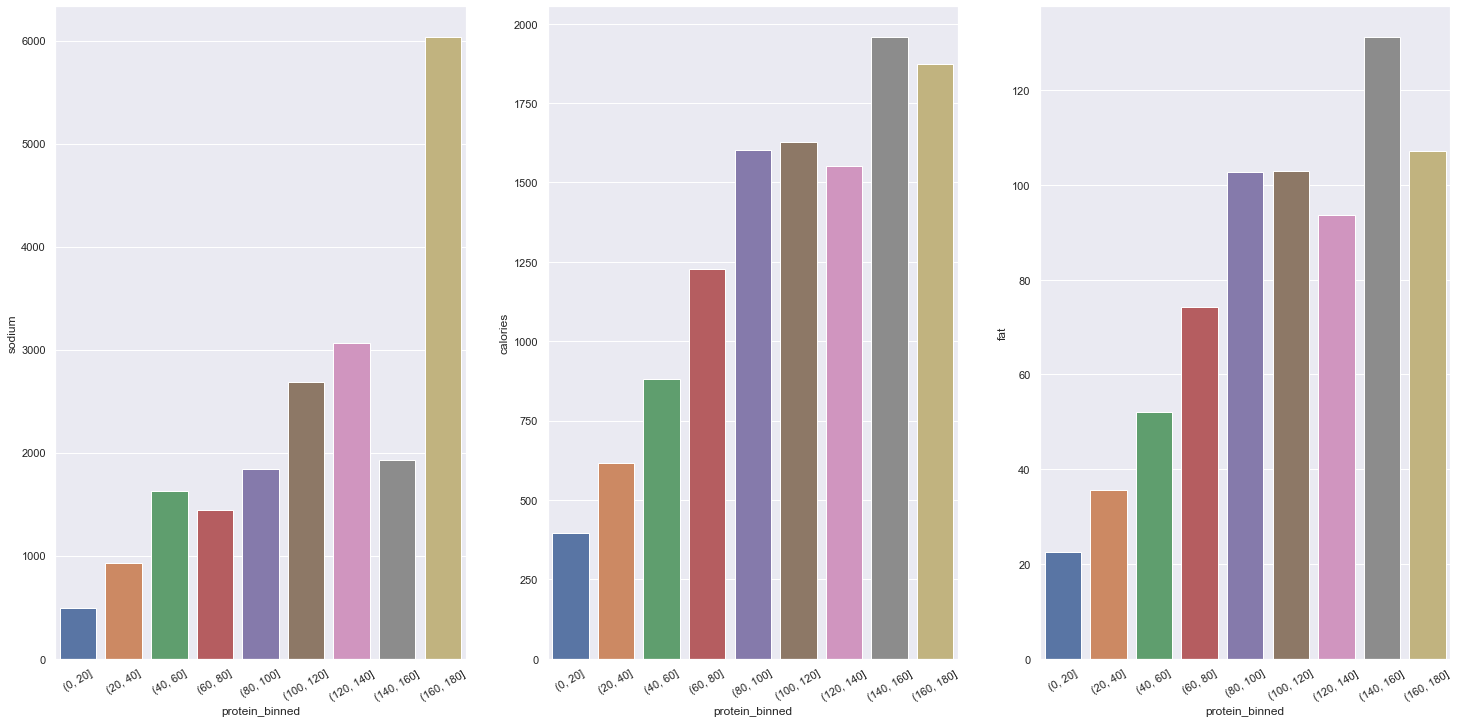

In [107]:

plt.subplot(1, 3, 1)
aux1 = data[['protein', 'sodium']].groupby('protein').mean().reset_index()

bins = list(np.arange(0, 200, 20))
aux1['protein_binned'] = pd.cut(aux1['protein'], bins=bins)
aux2 = aux1[['protein_binned', 'sodium']].groupby('protein_binned').mean().reset_index()
sns.barplot(x='protein_binned', y='sodium', data=aux2);
plt.xticks(rotation=30)


plt.subplot(1, 3, 2)
aux1 = data[['protein', 'calories']].groupby('protein').mean().reset_index()

bins = list(np.arange(0, 200, 20))
aux1['protein_binned'] = pd.cut(aux1['protein'], bins=bins)
aux2 = aux1[['protein_binned', 'calories']].groupby('protein_binned').mean().reset_index()
sns.barplot(x='protein_binned', y='calories', data=aux2)
plt.xticks(rotation=30);



plt.subplot(1, 3, 3)
aux1 = data[['protein', 'fat']].groupby('protein').mean().reset_index()

bins = list(np.arange(0, 200, 20))
aux1['protein_binned'] = pd.cut(aux1['protein'], bins=bins)
aux2 = aux1[['protein_binned', 'fat']].groupby('protein_binned').mean().reset_index()
sns.barplot(x='protein_binned', y='fat', data=aux2)
plt.xticks(rotation=30);

In [143]:
aux = data[data['rating'].notna()]

In [144]:
aux['rating'] = aux['rating'].round().astype('int64')

### 1.4.5 Rating per Date (Year, Month, Day)

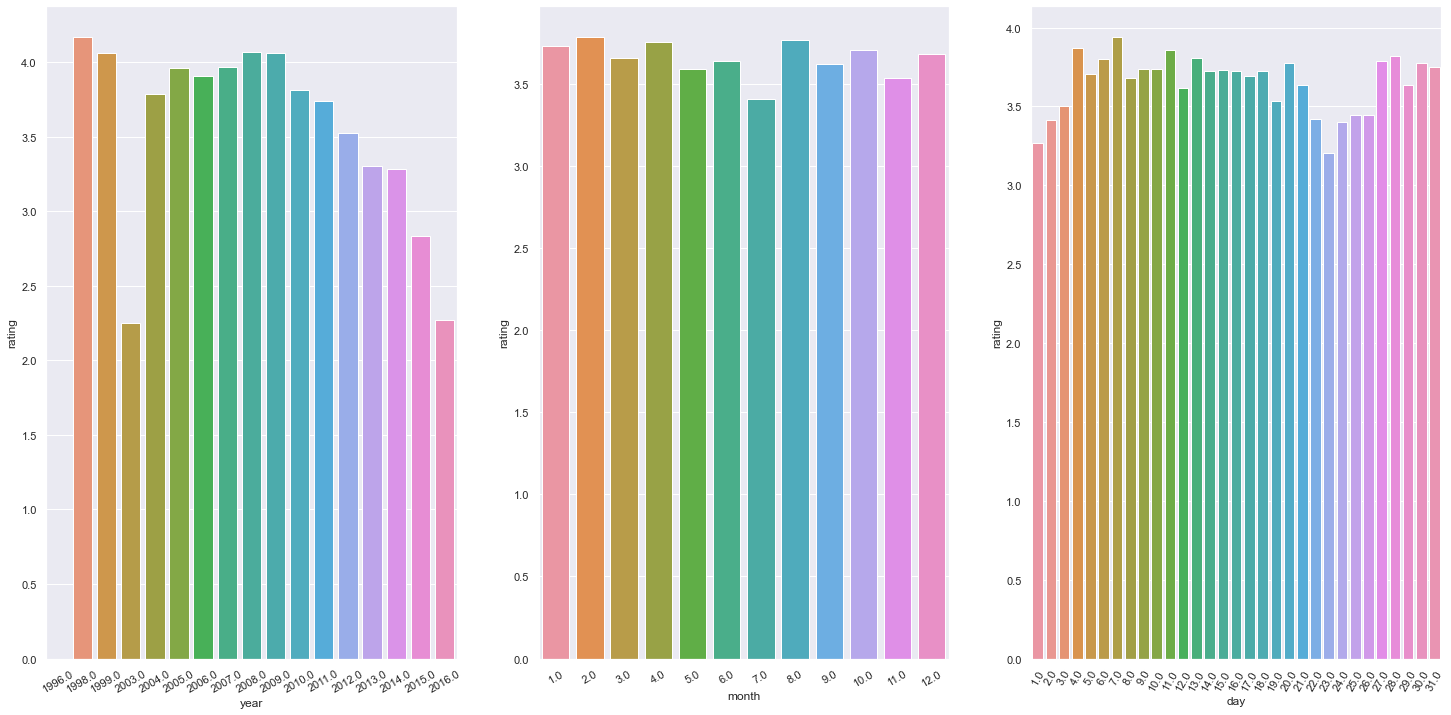

In [120]:
plt.subplot(1, 3, 1)
aux1 = data[['rating', 'year']].groupby('year').mean().reset_index()
sns.barplot(data = aux1, x= 'year', y = 'rating')
plt.xticks(rotation=30);

plt.subplot(1, 3, 2)
aux1 = data[['rating', 'month']].groupby('month').mean().reset_index()
sns.barplot(data = aux1, x= 'month', y = 'rating')
plt.xticks(rotation=30);

plt.subplot(1, 3, 3)
aux1 = data[['rating', 'day']].groupby('day').mean().reset_index()
sns.barplot(data = aux1, x= 'day', y = 'rating')
plt.xticks(rotation=60);

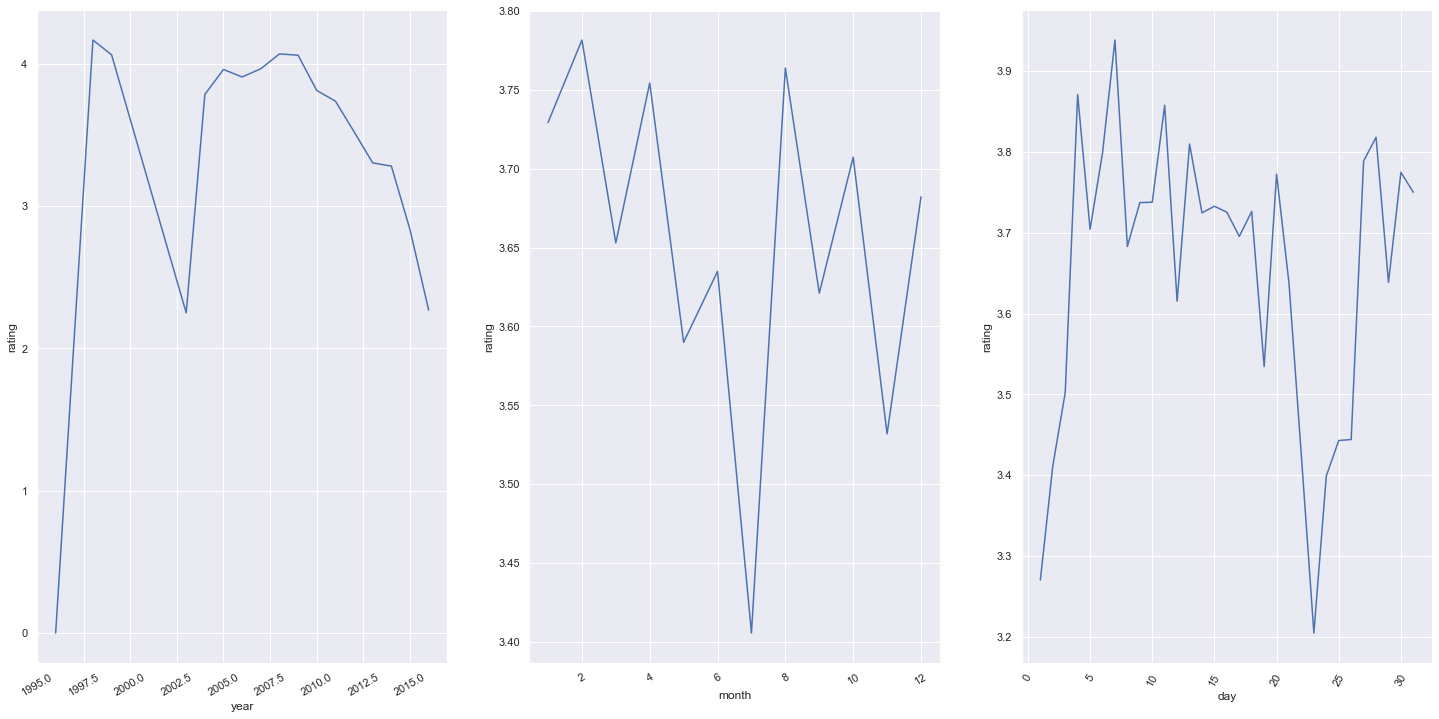

In [122]:
plt.subplot(1, 3, 1)
aux1 = data[['rating', 'year']].groupby('year').mean().reset_index()
sns.lineplot(data = aux1, x= 'year', y = 'rating')
plt.xticks(rotation=30);

plt.subplot(1, 3, 2)
aux1 = data[['rating', 'month']].groupby('month').mean().reset_index()
sns.lineplot(data = aux1, x= 'month', y = 'rating')
plt.xticks(rotation=30);

plt.subplot(1, 3, 3)
aux1 = data[['rating', 'day']].groupby('day').mean().reset_index()
sns.lineplot(data = aux1, x= 'day', y = 'rating')
plt.xticks(rotation=60);